In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
sns.set_style('darkgrid')        # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

pastel_colors = sns.color_palette('pastel')
deep_colors = sns.color_palette('deep')
set2_colors = sns.color_palette('Set2')

In [3]:
train_df = pd.read_csv('/Users/tomasroncak/Documents/diplomova_praca/data/preprocessed_category/train_dataset.csv')
test_df = pd.read_csv('/Users/tomasroncak/Documents/diplomova_praca/data/preprocessed_category/test_dataset.csv')
#whole_df = pd.read_csv('/Users/tomasroncak/Documents/diplomova_praca/data/preprocessed_category/whole_dataset.csv')

### Feature importance

In [51]:
X = train_df.iloc[:,4:-2]
y = train_df.iloc[:,-1]

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X, y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score = pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

remove = list(feature_score[:20]['feature'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'synack'),
  Text(1, 0, 'ackdat'),
  Text(2, 0, 'smean'),
  Text(3, 0, 'is_ftp_login'),
  Text(4, 0, 'tcprtt'),
  Text(5, 0, 'ct_flw_http_mthd'),
  Text(6, 0, 'trans_depth'),
  Text(7, 0, 'response_body_len'),
  Text(8, 0, 'ct_state_ttl'),
  Text(9, 0, 'sload'),
  Text(10, 0, 'sinpkt'),
  Text(11, 0, 'dinpkt'),
  Text(12, 0, 'djit'),
  Text(13, 0, 'sloss'),
  Text(14, 0, 'dmean'),
  Text(15, 0, 'sjit'),
  Text(16, 0, 'dbytes'),
  Text(17, 0, 'dloss'),
  Text(18, 0, 'dload'),
  Text(19, 0, 'dtcpb'),
  Text(20, 0, 'stcpb'),
  Text(21, 0, 'ct_src_ltm'),
  Text(22, 0, 'ct_dst_ltm'),
  Text(23, 0, 'ct_dst_sport_ltm'),
  Text(24, 0, 'ct_src_dport_ltm'),
  Text(25, 0, 'ct_srv_src'),
  Text(26, 0, 'ct_srv_dst'),
  Text(27, 0, 'ct_dst_src_ltm'),
  Text(28, 0, 'sttl'),
  Text(29, 0, 'dttl'),
  Text(30, 

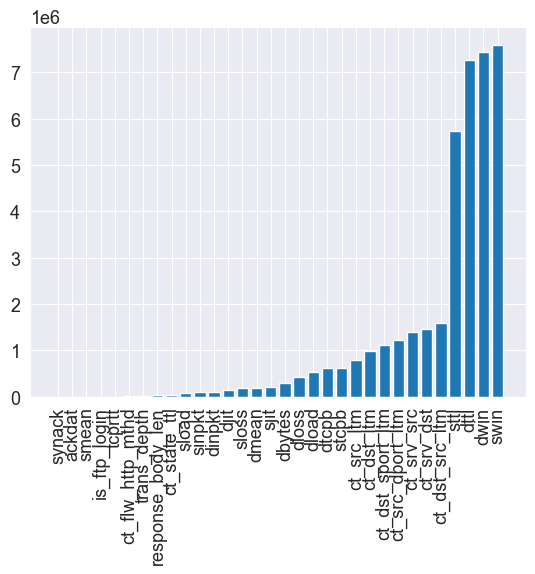

In [21]:
plt.bar(feature_score['feature'],feature_score['score'])
plt.xticks(rotation=90)

In [33]:
train_df.drop(columns=remove, inplace=True)
test_df.drop(columns=remove, inplace=True)

### Upsampling

In [4]:
def calculate_percentage(attack_types_and_sums, decimal):
    percentage = []
    for cat in attack_types_and_sums:
        pct = (cat / attack_types_and_sums.sum()) * 100
        percentage.append(round(pct, decimal))
    return percentage

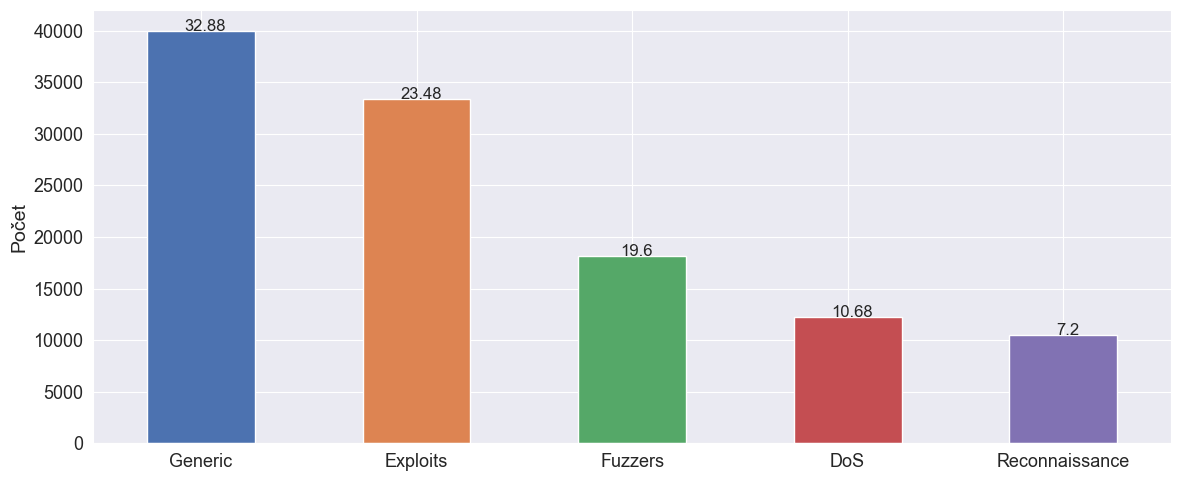

In [5]:
plt.figure(figsize=(12,5), tight_layout=True)
plt.ylabel('Počet')

ax = train_df['attack_cat'][train_df['attack_cat'] != 'Normal'].value_counts().plot(kind='bar', color=deep_colors[:5], rot=0)

percentage = calculate_percentage(train_df.attack_cat.value_counts(), 2)
for idx, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2 + 0.02
    y = p.get_y() + p.get_height()
    ax.annotate(percentage[idx], (x, y), size = 12, ha='center')
    idx += 1

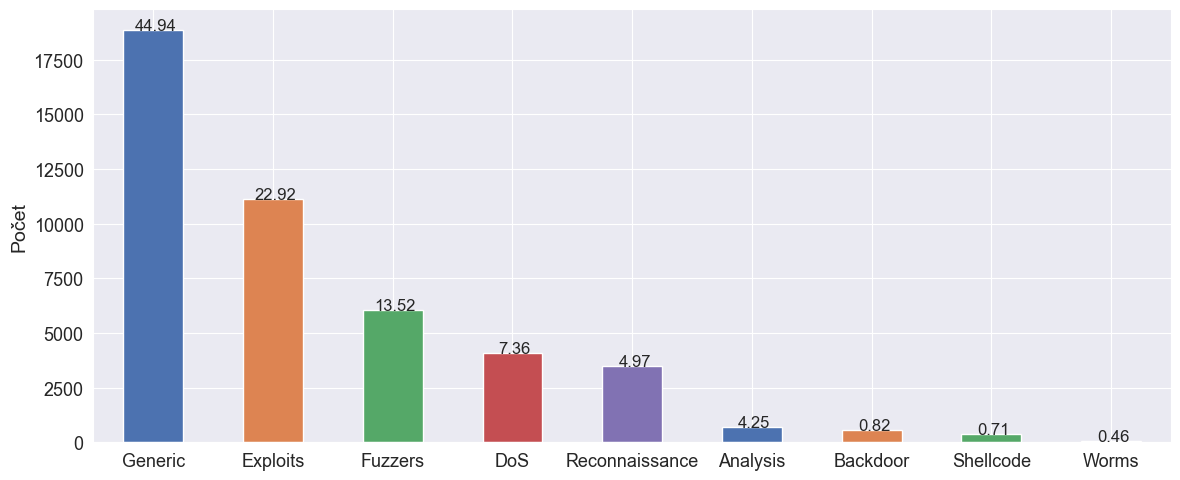

In [30]:
plt.figure(figsize=(12,5), tight_layout=True)
plt.ylabel('Počet')

ax = test_df['attack_cat'][test_df['attack_cat'] != 'Normal'].value_counts().plot(kind='bar', color=deep_colors[:5], rot=0)

percentage = calculate_percentage(test_df.attack_cat.value_counts(), 2)
for idx, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2 + 0.02
    y = p.get_y() + p.get_height()
    ax.annotate(percentage[idx], (x, y), size = 12, ha='center')
    idx += 1

In [6]:
attacks = ['Reconnaissance', 'DoS', 'Fuzzers', 'Exploits']

In [7]:
def upsample_dataset(df):
    for attack in attacks:
        attack_df = df[df['attack_cat'] == attack]
        upsample_size = len(df[df['attack_cat'] == 'Generic']) - len(attack_df)
        
        upsample = resample(
                attack_df,
                replace=True,
                n_samples=upsample_size,
                random_state=42
                )
        df = pd.concat([df, upsample])
    return df

In [8]:
train_df_upsampled = upsample_dataset(train_df)
test_df_upsampled = upsample_dataset(test_df)

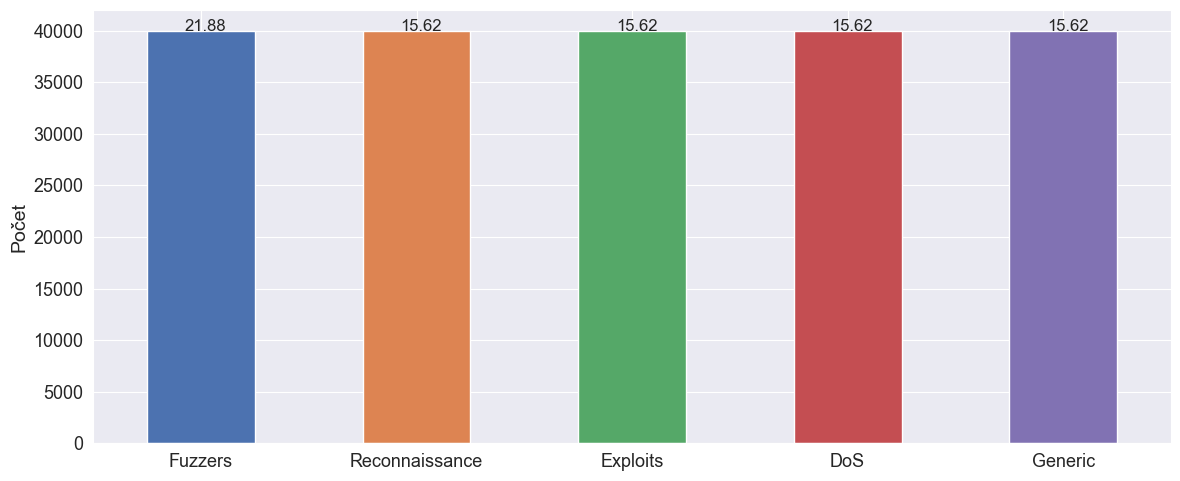

In [9]:
plt.figure(figsize=(12,5), tight_layout=True)
plt.ylabel('Počet')

ax = train_df_upsampled['attack_cat'][train_df_upsampled['attack_cat'] != 'Normal'].value_counts().plot(kind='bar', color=deep_colors[:5], rot=0)

percentage = calculate_percentage(train_df_upsampled.attack_cat.value_counts(), 2)
for idx, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2 + 0.02
    y = p.get_y() + p.get_height()
    ax.annotate(percentage[idx], (x, y), size = 12, ha='center')
    idx += 1

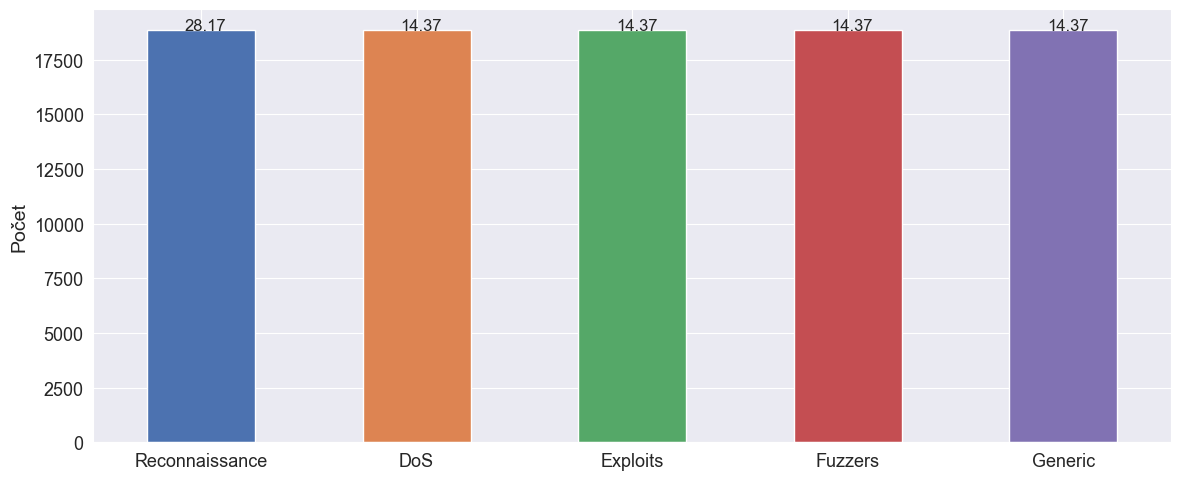

In [10]:
plt.figure(figsize=(12,5), tight_layout=True)
plt.ylabel('Počet')

ax = test_df_upsampled['attack_cat'][test_df_upsampled['attack_cat'] != 'Normal'].value_counts().plot(kind='bar', color=deep_colors[:5], rot=0)

percentage = calculate_percentage(test_df_upsampled.attack_cat.value_counts(), 2)
for idx, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2 + 0.02
    y = p.get_y() + p.get_height()
    ax.annotate(percentage[idx], (x, y), size = 12, ha='center')
    idx += 1

In [11]:
train_df_upsampled.to_csv('/Users/tomasroncak/Documents/diplomova_praca/data/preprocessed_category/train_dataset_upsampled.csv', index=False)
test_df_upsampled.to_csv('/Users/tomasroncak/Documents/diplomova_praca/data/preprocessed_category/test_dataset_upsampled.csv', index=False)